<a href="https://colab.research.google.com/github/Arnab1056/Automated-Fish-Species-Recognition-based-on-CNN__NNFL/blob/main/NNFL_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset From Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset load

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

#Dataset Load
DATA_DIR_ZIP = "/content/drive/MyDrive/NNFL_DATASET/Processed_Data.zip"
UNZIPPED_DATA_DIR = "/content/unzipped_data"

#Directory for unzipped data
if not os.path.exists(UNZIPPED_DATA_DIR):
    os.makedirs(UNZIPPED_DATA_DIR)
    import zipfile
    with zipfile.ZipFile(DATA_DIR_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DATA_DIR)
    print(f"Unzipped data to {UNZIPPED_DATA_DIR}")

DATA_DIR = os.path.join(UNZIPPED_DATA_DIR, "Processed Data")

# Image parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

# Split parameters
TEST_SPLIT = 0.30

print("Loading and splitting dataset ...")

# Create the Training dataset (70%)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Create the Testing dataset (30%)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Get the class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

# Optimize Data Performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Dataset loading and optimization complete.")

Loading and splitting dataset ...
Found 2455 files belonging to 7 classes.
Using 1719 files for training.
Found 2455 files belonging to 7 classes.
Using 736 files for validation.
Found 7 classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']
Dataset loading and optimization complete.


#First Model

Loading and splitting dataset....
Found 2455 files belonging to 7 classes.
Using 1719 files for training.
Found 2455 files belonging to 7 classes.
Using 736 files for validation.
Found 7 classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']
Building the CNN model....
Compiling the model...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,911 (32.36 MB)

 Trainable params: 8,483,911 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

Starting training for 30 epochs....
Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.2127 - loss: 2.4851 - val_accuracy: 0.4878 - val_loss: 1.2153
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5682 - loss: 1.1430 - val_accuracy: 0.5720 - val_loss: 0.9834
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6979 - loss: 0.8302 - val_accuracy: 0.5435 - val_loss: 1.1957
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6916 - loss: 0.7814 - val_accuracy: 0.7731 - val_loss: 0.6924
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8023 - loss: 0.5393 - val_accuracy: 0.8587 - val_loss: 0.4058
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8433 - loss: 0.4100 - val_accuracy: 0.8668 - val_loss: 0.3982
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8823 - loss: 0.3077 - val_accuracy: 0.9008 - val_loss: 0.2778
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accur

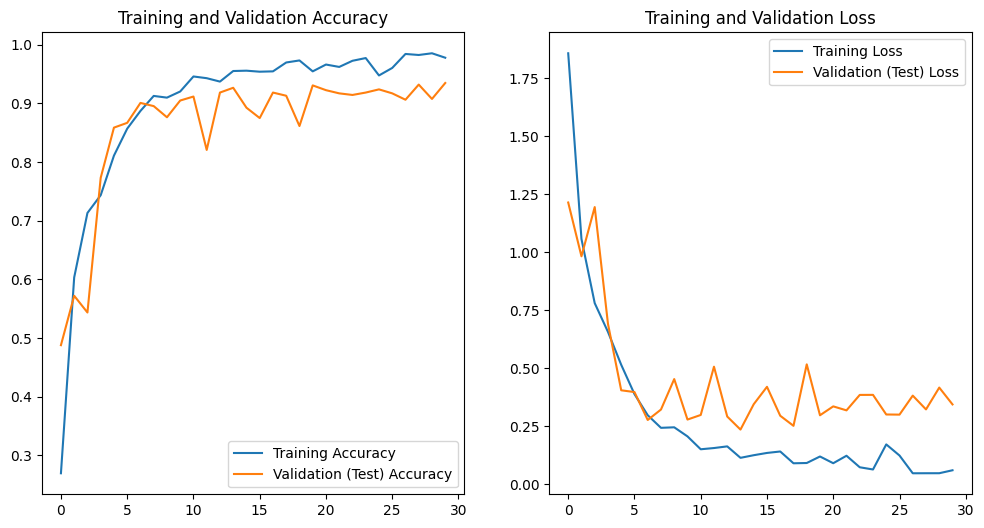

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

#Zip Uploading And Unzip
DATA_DIR_ZIP = "/content/drive/MyDrive/NNFL_DATASET/Processed_Data.zip"
UNZIPPED_DATA_DIR = "/content/unzipped_data"

#Directory for unzipped data
if not os.path.exists(UNZIPPED_DATA_DIR):
    os.makedirs(UNZIPPED_DATA_DIR)
    import zipfile
    with zipfile.ZipFile(DATA_DIR_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DATA_DIR)
    print(f"Unzipped data to {UNZIPPED_DATA_DIR}")

#storing sub directories in a folder
DATA_DIR = os.path.join(UNZIPPED_DATA_DIR, "Processed Data")


# Image parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

# Split parameters
TEST_SPLIT = 0.30
VALIDATION_SPLIT = 0.70

# Training parameters
EPOCHS = 30


print("Loading and splitting dataset....")

#use Training dataset 70% and Create training dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

#use validation split and create 30% testing dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

#get the class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

#Optimize data performance and .cache() for keep images loaded in the memory and
#.prefetch() to overlap data processing and model execution

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


print("Building the CNN model....")

#CNN architecture
model = keras.Sequential([
    # Layer rescaling
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # First Convolution
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Second Convolution
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Third Convolution
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Flatten Layer
    layers.Flatten(),

    # Fully connected Danse and Hidden layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    #output layer with softmax fuction
    layers.Dense(num_classes, activation='softmax')
])

print("Compiling the model...")

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print Summery Model
model.summary()

print(f"Starting training for {EPOCHS} epochs....")

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

print("Training complete....")

print("Evaluating model on test data....")

# Get Final loss and accuracy
loss, accuracy = model.evaluate(test_dataset)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss}")

#show training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

# training and validation accuracy Ploting
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation (Test) Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# training and validation loss Ploting
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation (Test) Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#Plot Saving
plt.savefig('training_history.png')
print("Saved training history plot to 'training_history.png'....")

#Confusion Metrics

Classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']


<Figure size 1000x800 with 0 Axes>

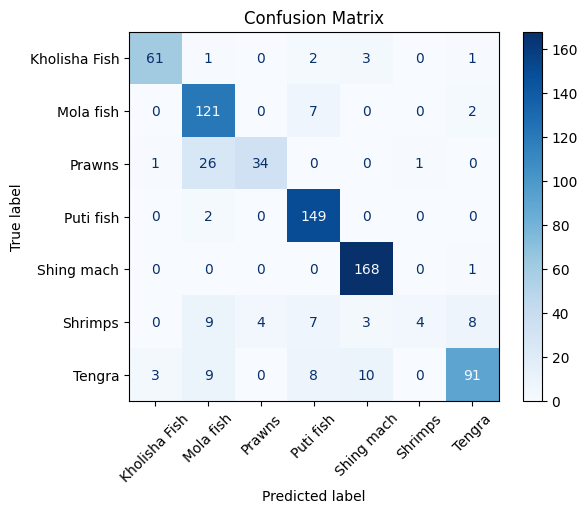

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classes:", class_names)

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images, verbose=0)
    preds = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.savefig("confusion_matrix.png")
plt.show()


#Metrics

In [8]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy*100:.2f}%\n")

# Detailed classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


Overall Accuracy: 85.33%

Classification Report:

               precision    recall  f1-score   support

Kholisha Fish       0.94      0.90      0.92        68
    Mola fish       0.72      0.93      0.81       130
       Prawns       0.89      0.55      0.68        62
    Puti fish       0.86      0.99      0.92       151
   Shing mach       0.91      0.99      0.95       169
      Shrimps       0.80      0.11      0.20        35
       Tengra       0.88      0.75      0.81       121

     accuracy                           0.85       736
    macro avg       0.86      0.75      0.76       736
 weighted avg       0.86      0.85      0.84       736



#MobileNetV2

--- Loading and splitting dataset for transfer learning ---
Found 2455 files belonging to 7 classes.
Using 1719 files for training.
Found 2455 files belonging to 7 classes.
Using 736 files for validation.
Found 7 classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']
--- Loading pre-trained MobileNetV2 base model ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Adding custom top layers to the base model ---
--- Compiling the transfer learning model ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

--- Starting training of transfer learning model for 30 epochs ---
Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 168ms/step - accuracy: 0.5167 - loss: 1.4613 - val_accuracy: 0.8220 - val_loss: 0.5321
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8128 - loss: 0.5485 - val_accuracy: 0.8451 - val_loss: 0.4662
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8292 - loss: 0.4690 - val_accuracy: 0.8628 - val_loss: 0.3865
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8521 - loss: 0.3843 - val_accuracy: 0.8682 - val_loss: 0.3850
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8699 - loss: 0.3654 - val_accuracy: 0.8533 - val_loss: 0.4163
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8780 - loss: 0.3327 - val_accuracy: 0.8777 - val_loss: 0.3350
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8960 - loss: 0.2880 - val_accuracy: 0.8668 - val_loss: 0.3769
Epoch 8/30
108/108 ━━━━━━━━━

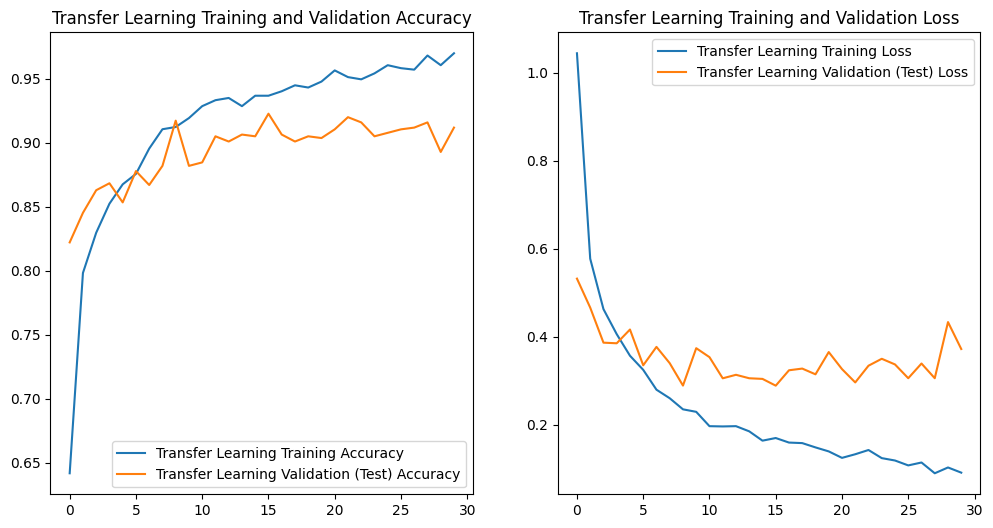

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import os
import matplotlib.pyplot as plt

#Zip Uploading And Unzip
DATA_DIR_ZIP = "/content/drive/MyDrive/NNFL_DATASET/Processed_Data.zip"
UNZIPPED_DATA_DIR = "/content/unzipped_data"

#check data unzipped
if not os.path.exists(UNZIPPED_DATA_DIR):
    os.makedirs(UNZIPPED_DATA_DIR)
    import zipfile
    with zipfile.ZipFile(DATA_DIR_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DATA_DIR)
    print(f"Unzipped data to {UNZIPPED_DATA_DIR}")

DATA_DIR = os.path.join(UNZIPPED_DATA_DIR, "Processed Data")

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
TEST_SPLIT = 0.30
EPOCHS = 30

#Loading and Spliting dataset
print("Loading and splitting dataset....")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Load Pretrain Model
print("Loading pre-trained MobileNetV2 base model....")
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                         include_top=False,
                         weights='imagenet')

# Add Custom Layers
print("Adding custom Layers....")
base_model.trainable = False

model_transfer = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
print("Compiling the transfer learning model...")
model_transfer.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model_transfer.summary()

# Training model
print(f"Starting training of transfer learning model for {EPOCHS} epochs....")
history_transfer = model_transfer.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)
print("Model training complete....")

# Evaluate the model
print("Evaluating transfer learning model on test data....")
loss_transfer, accuracy_transfer = model_transfer.evaluate(test_dataset)
print(f"\nTransfer Learning Test Accuracy: {accuracy_transfer * 100:.2f}%")
print(f"Transfer Learning Test Loss: {loss_transfer}")

# Visualize the model
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer_hist = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_transfer, label='Transfer Learning Training Accuracy')
plt.plot(epochs_range, val_acc_transfer, label='Transfer Learning Validation (Test) Accuracy')
plt.legend(loc='lower right')
plt.title('Transfer Learning Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_transfer_hist, label='Transfer Learning Training Loss')
plt.plot(epochs_range, val_loss_transfer, label='Transfer Learning Validation (Test) Loss')
plt.legend(loc='upper right')
plt.title('Transfer Learning Training and Validation Loss')

plt.savefig('transfer_learning_training_history.png')
print("--- Saved transfer learning training history plot to 'transfer_learning_training_history.png' ---")

# VGG 16

--- Loading and splitting dataset for transfer learning ---
Found 2455 files belonging to 7 classes.
Using 1719 files for training.
Found 2455 files belonging to 7 classes.
Using 736 files for validation.
Found 7 classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']
--- Loading pre-trained VGG16 base model ---
--- Adding custom top layers to the base model ---
--- Compiling the VGG16 transfer learning model ---


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

--- Starting training of VGG16 transfer learning model for 30 epochs ---
Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.5414 - loss: 5.9956 - val_accuracy: 0.9429 - val_loss: 0.2005
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9243 - loss: 0.3879 - val_accuracy: 0.9524 - val_loss: 0.2043
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9388 - loss: 0.2336 - val_accuracy: 0.9674 - val_loss: 0.1307
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9437 - loss: 0.1641 - val_accuracy: 0.9674 - val_loss: 0.1065
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9577 - loss: 0.1073 - val_accuracy: 0.9701 - val_loss: 0.0923
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9759 - loss: 0.0715 - val_accuracy: 0.9769 - val_loss: 0.0752
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9782 - loss: 0.0607 - val_accuracy: 0.9728 - val_loss: 0.0879
Epoch 8/30
108/108 ━━━━

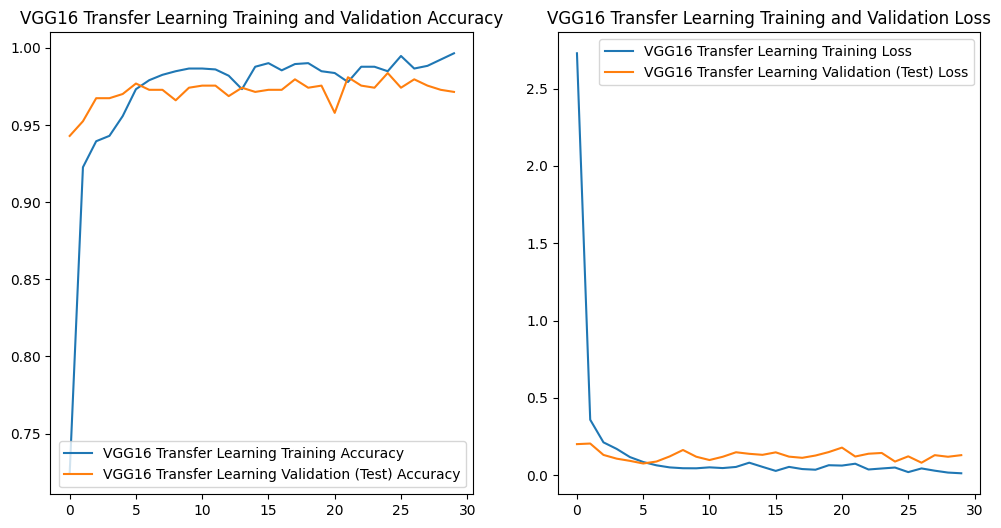

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import os
import matplotlib.pyplot as plt

# Dataset upload and unzip
DATA_DIR_ZIP = "/content/drive/MyDrive/NNFL_DATASET/Processed_Data.zip"
UNZIPPED_DATA_DIR = "/content/unzipped_data"

# dataset unzip
if not os.path.exists(UNZIPPED_DATA_DIR):
    os.makedirs(UNZIPPED_DATA_DIR)
    import zipfile
    with zipfile.ZipFile(DATA_DIR_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DATA_DIR)
    print(f"Unzipped data to {UNZIPPED_DATA_DIR}")

DATA_DIR = os.path.join(UNZIPPED_DATA_DIR, "Processed Data")

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
TEST_SPLIT = 0.30
EPOCHS = 30

# Load and split dataset
print("Loading and splitting dataset for transfer learning ....")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Load pre-trained model
print("Loading pre-trained VGG16 base model....")
base_model = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                         include_top=False,
                         weights='imagenet')

# Add custom layers
print("Adding custom top layers to the base model....")
base_model.trainable = False

model_transfer = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
print("Compiling the VGG16 transfer learning model ....")
model_transfer.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model_transfer.summary()

# Train the model
print(f"Starting training of VGG16 transfer learning model for {EPOCHS} epochs....")
history_transfer = model_transfer.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)
print("VGG16 transfer learning model training complete....")

# Evaluate the Model
print("Evaluating VGG16 transfer learning model on test data....")
loss_transfer, accuracy_transfer = model_transfer.evaluate(test_dataset)
print(f"\nVGG16 Transfer Learning Test Accuracy: {accuracy_transfer * 100:.2f}%")
print(f"VGG16 Transfer Learning Test Loss: {loss_transfer}")

# Visualize Training Results
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer_hist = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_transfer, label='VGG16 Transfer Learning Training Accuracy')
plt.plot(epochs_range, val_acc_transfer, label='VGG16 Transfer Learning Validation (Test) Accuracy')
plt.legend(loc='lower right')
plt.title('VGG16 Transfer Learning Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_transfer_hist, label='VGG16 Transfer Learning Training Loss')
plt.plot(epochs_range, val_loss_transfer, label='VGG16 Transfer Learning Validation (Test) Loss')
plt.legend(loc='upper right')
plt.title('VGG16 Transfer Learning Training and Validation Loss')

plt.savefig('vgg16_transfer_learning_training_history.png')
print("Saved VGG16 transfer learning training history plot to 'vgg16_transfer_learning_training_history.png'....")

# ResNet50(Best Model)


Loading and splitting dataset for ResNet50 transfer learning....
Found 2455 files belonging to 7 classes.
Using 1719 files for training.
Found 2455 files belonging to 7 classes.
Using 736 files for validation.
Found 7 classes: ['Kholisha Fish', 'Mola fish', 'Prawns', 'Puti fish', 'Shing mach', 'Shrimps', 'Tengra']
Loading pre-trained ResNet50 base model....
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Adding custom top layers to the ResNet50 base model....
Compiling the ResNet50 transfer learning model


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 526,343 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Starting training of ResNet50 transfer learning model for 30 epochs
Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step - accuracy: 0.7034 - loss: 1.2559 - val_accuracy: 0.9429 - val_loss: 0.2182
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9375 - loss: 0.2082 - val_accuracy: 0.9552 - val_loss: 0.1557
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9440 - loss: 0.1484 - val_accuracy: 0.9511 - val_loss: 0.1565
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9681 - loss: 0.0978 - val_accuracy: 0.9389 - val_loss: 0.1538
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9721 - loss: 0.0951 - val_accuracy: 0.9633 - val_loss: 0.1158
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9797 - loss: 0.0659 - val_accuracy: 0.9497 - val_loss: 0.1545
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9638 - loss: 0.1117 - val_accuracy: 0.9552 - val_loss: 0.1671
Epoch 8/30
108/108 ━━━━━━━━

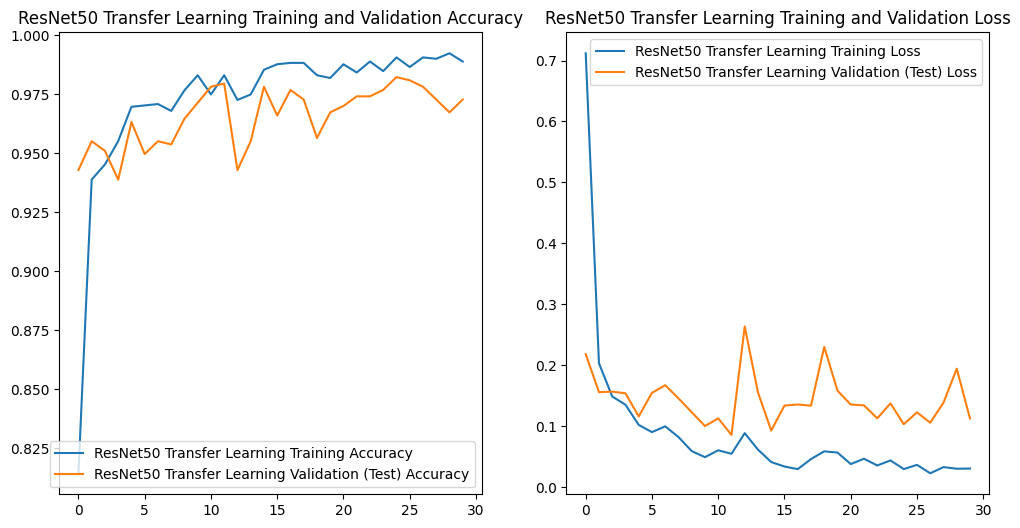

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
import os
import matplotlib.pyplot as plt

# Dataset upload and unzip
DATA_DIR_ZIP = "/content/drive/MyDrive/NNFL_DATASET/Processed_Data.zip"
UNZIPPED_DATA_DIR = "/content/unzipped_data"

# dataset unzip
if not os.path.exists(UNZIPPED_DATA_DIR):
    os.makedirs(UNZIPPED_DATA_DIR)
    import zipfile
    with zipfile.ZipFile(DATA_DIR_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DATA_DIR)
    print(f"Unzipped data to {UNZIPPED_DATA_DIR}")

DATA_DIR = os.path.join(UNZIPPED_DATA_DIR, "Processed Data")

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
TEST_SPLIT = 0.30
EPOCHS = 30

# Load and split dataset
print("Loading and splitting dataset for ResNet50 transfer learning....")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=TEST_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Load Pre-trained model
print("Loading pre-trained ResNet50 base model....")
base_model_resnet50 = ResNet50(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                         include_top=False,
                         weights='imagenet')

# Add Custom Top Layers
print("Adding custom top layers to the ResNet50 base model....")
base_model_resnet50.trainable = False

model_resnet50_transfer = keras.Sequential([
    base_model_resnet50,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the Model
print("Compiling the ResNet50 transfer learning model")
model_resnet50_transfer.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model_resnet50_transfer.summary()

# Train the Model
print(f"Starting training of ResNet50 transfer learning model for {EPOCHS} epochs")
history_resnet50_transfer = model_resnet50_transfer.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)
print("ResNet50 transfer learning model training complete")

# Evaluate the Model
print("Evaluating ResNet50 transfer learning model on test data ---")
loss_resnet50_transfer, accuracy_resnet50_transfer = model_resnet50_transfer.evaluate(test_dataset)
print(f"\nResNet50 Transfer Learning Test Accuracy: {accuracy_resnet50_transfer * 100:.2f}%")
print(f"ResNet50 Transfer Learning Test Loss: {loss_resnet50_transfer}")

# Visualize Training Results
acc_resnet50_transfer = history_resnet50_transfer.history['accuracy']
val_acc_resnet50_transfer = history_resnet50_transfer.history['val_accuracy']
loss_resnet50_transfer_hist = history_resnet50_transfer.history['loss']
val_loss_resnet50_transfer = history_resnet50_transfer.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_resnet50_transfer, label='ResNet50 Transfer Learning Training Accuracy')
plt.plot(epochs_range, val_acc_resnet50_transfer, label='ResNet50 Transfer Learning Validation (Test) Accuracy')
plt.legend(loc='lower right')
plt.title('ResNet50 Transfer Learning Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_resnet50_transfer_hist, label='ResNet50 Transfer Learning Training Loss')
plt.plot(epochs_range, val_loss_resnet50_transfer, label='ResNet50 Transfer Learning Validation (Test) Loss')
plt.legend(loc='upper right')
plt.title('ResNet50 Transfer Learning Training and Validation Loss')

plt.savefig('resnet50_transfer_learning_training_history.png')
print("--- Saved ResNet50 transfer learning training history plot to 'resnet50_transfer_learning_training_history.png' ---")

### Exploratory Data Analysis (EDA)

---



Training dataset class distribution:
  Tengra: 310 images
  Shrimps: 87 images
  Mola fish: 275 images
  Kholisha Fish: 160 images
  Prawns: 163 images
  Shing mach: 380 images
  Puti fish: 344 images

Test dataset class distribution:
  Mola fish: 130 images
  Tengra: 121 images
  Puti fish: 151 images
  Shing mach: 169 images
  Kholisha Fish: 68 images
  Shrimps: 35 images
  Prawns: 62 images


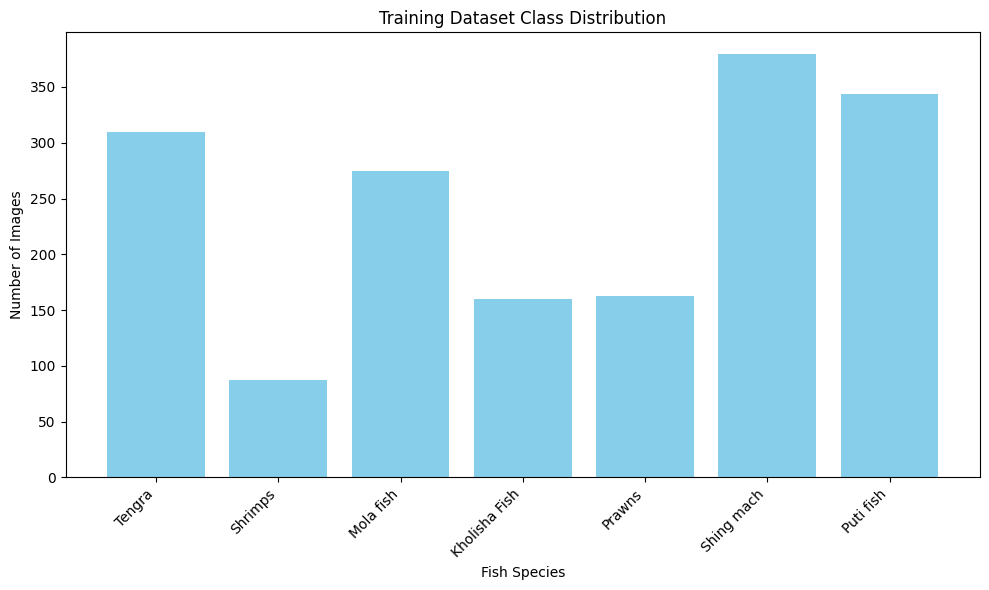

In [ ]:
# label distribution in dataset
def get_label_distribution(dataset, class_names):
    labels = []
    for _, batch_labels in dataset:
        labels.extend(batch_labels.numpy())

    label_counts = collections.Counter(labels)

    named_label_counts = {class_names[k]: v for k, v in label_counts.items()}
    return named_label_counts

# distributions for training and test datasets
train_label_counts = get_label_distribution(train_dataset, class_names)
test_label_counts = get_label_distribution(test_dataset, class_names)

print("Training dataset class distribution:")
for name, count in train_label_counts.items():
    print(f"  {name}: {count} images")

print("\nTest dataset class distribution:")
for name, count in test_label_counts.items():
    print(f"  {name}: {count} images")

# Show training dataset
plt.figure(figsize=(10, 6))
plt.bar(train_label_counts.keys(), train_label_counts.values(), color='skyblue')
plt.xlabel('Fish Species')
plt.ylabel('Number of Images')
plt.title('Training Dataset Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Sample Image Showing from Dataset

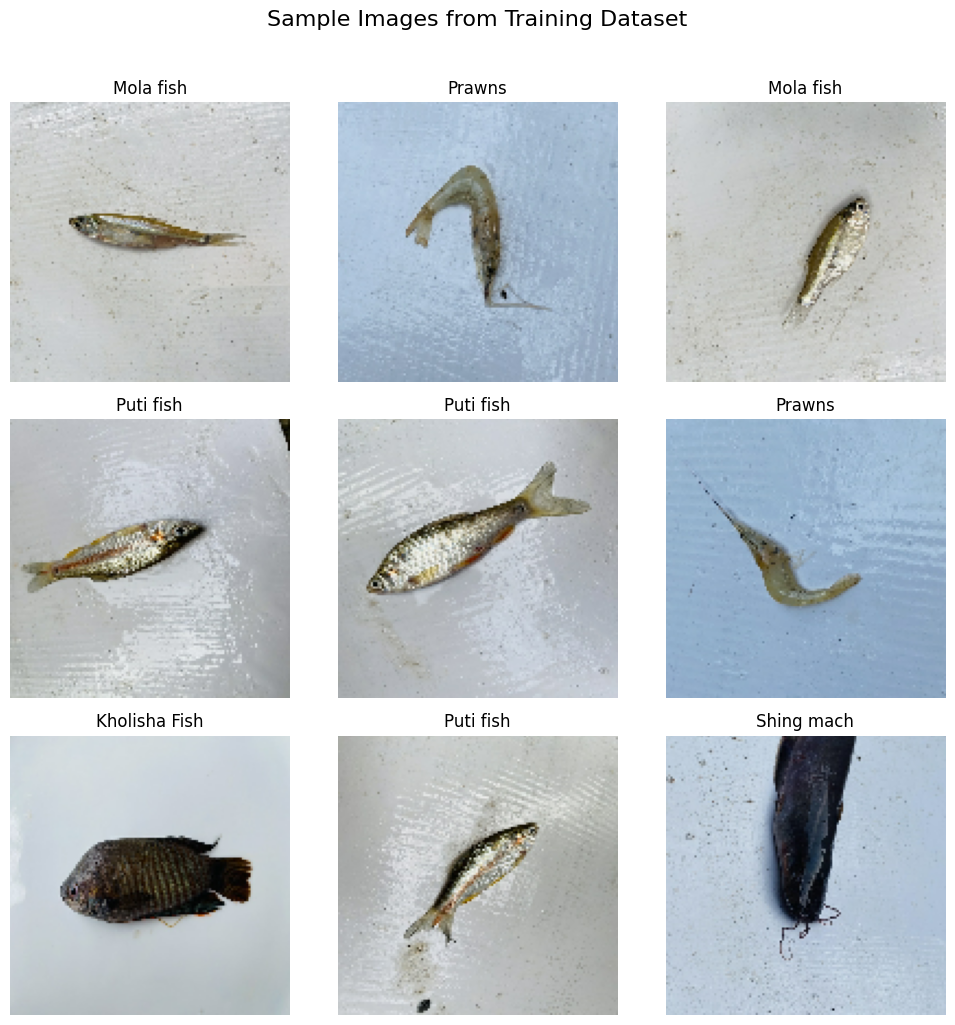

In [ ]:
#Show training dataset images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle('Sample Images from Training Dataset', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()